## Project Title: Analyzing Amazon Reviews for Product Insights
### The P < 0.05 Team - Haig Bedros, Noori Selina, Julia Ferris, Matthew Roland

### The Question:
How do different product features and review characteristics affect customer satisfaction as shown by review ratings on Amazon?


### Data Sources:
We will use the Amazon Review Data (2018) provided by Jianmo Ni from UCSD. This dataset includes reviews (ratings, text, helpfulness votes), product details (descriptions, categories, price, brand, and image features), and links (also viewed/also bought graphs). It covers reviews from May 1996 to October 2018 and includes 233.1 million reviews.

The dataset can be found [here](https://nijianmo.github.io/amazon/index.html).


**1. Data Preparation and Cleaning**
- **Assigned to:** Matt and Haig
- **Responsibilities:**
  - Load the dataset and parse the JSON files.
  - Clean the data by removing HTML/CSS content, duplicates, and irrelevant information.


To begin, the libraries needed for data preparation and cleaning are loaded.

In [4]:
import pandas as pd
import gzip
import json
import ijson

Next, the function parse is created to access the data. The function getDF is also creased to return a pandas dataframe.

In [5]:
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF("C:\\Users\\Black\\Downloads\\Electronics_5.json.gz")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Black\\Downloads\\Electronics_5.json.gz'

The time variable called 'reviewTime' is then converted to the type datetime in the dataframe, and a column 'year' is created based on the datetime.

In [6]:
df['datetime'] = pd.to_datetime(df['reviewTime'])
df['year'] = df['datetime'].dt.year

NameError: name 'df' is not defined

Only data after 2017 was included in the final dataframe.

In [ ]:
df_filtered = df.loc[df['year'] > 2016]


Some more variables were not included in the final product. This was to reduce the size of the data and ignore columns that would not be used for analysis.

In [ ]:
df_filtered = df_filtered.drop(['vote', 'unixReviewTime', 'style', 'image', 'verified', 'year'], axis = 1)

Finally, the resulting dataframe was saved to a file named electronics.csv.

In [ ]:
df_filtered.to_csv('electronics.csv', index = False)

**2. Descriptive Analysis and Visualization**
- **Assigned to:** Julia
- **Responsibilities:**
  - Perform basic statistics on the dataset (e.g., average rating, number of reviews per product).
  - Create visualizations to show key metrics like rating distribution, number of reviews per category, and product pricing.


To begin, the data is loaded from the csv file that was created in the first step.

In [7]:
import pandas as pd

url = 'https://media.githubusercontent.com/media/hbedros/data620-final-project/main/electronics.csv'
df = pd.read_csv(url,index_col=0)

The data is described in its original format.

In [8]:
df.describe()

,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,datetime
count,1290345,1290345,1290345,1290025,1289705,1290009,1290345
unique,642,384641,97768,277888,1045888,635766,642
top,"01 9, 2017",A2XP8CV9ES33AM,B010OYASRG,Amazon Customer,good,Five Stars,2017-01-09
freq,5061,166,2863,69042,5710,297964,5061


The ratings of each review are added as a column.

In [9]:
df['rating'] = list(df.index)

More specific values are displayed and then specified - unique user IDs, unique product IDs, reviews per user, and reviews per product.

In [10]:
unique_users = df['reviewerID'].nunique()
unique_products = df['asin'].nunique()
reviews_per_user = df['reviewerID'].value_counts()
reviews_per_product = df['asin'].value_counts()

print(f'Unique users: {unique_users}')
print(f'Unique products: {unique_products}')
print(f'Reviews per user:\n{reviews_per_user}')
print(f'Reviews per product:\n{reviews_per_product}')


Unique users: 384641
Unique products: 97768
Reviews per user:
reviewerID
A2XP8CV9ES33AM    166
A10SE0U42ABS9S    132
A24SPLNZFDBKD3     89
A3VFRG9YVQCUWO     81
A2DIQTZPF26T1L     80
                 ... 
A3PFLKF0HGH0VU      1
A2DKV3MEZ51PDD      1
A2X267JLQK7I4X      1
A1U64WC1WQ679Z      1
A2HE7TX3FE1RLE      1
Name: count, Length: 384641, dtype: int64
Reviews per product:
asin
B010OYASRG    2863
B000WYVBR0    2337
B0143IIP4W    2121
B000VS4HDM    2102
B00JX1ZS5O    1965
              ... 
B00KKWRQTQ       1
B0056Z3W6I       1
B00KKPQ2PC       1
B0056ZMP0C       1
B01HJF704M       1
Name: count, Length: 97768, dtype: int64


It will be interesting to see the number of reviews over time.

In [11]:
from datetime import datetime

df['datetime'] = df['datetime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

review_counts_over_time = df['datetime'].dt.date.value_counts().sort_index()

print(review_counts_over_time)


datetime
2017-01-01    2998
2017-01-02    4380
2017-01-03    4993
2017-01-04    4714
2017-01-05    4643
              ... 
2018-09-30      25
2018-10-01      17
2018-10-02       6
2018-10-03       2
2018-10-04       2
Name: count, Length: 642, dtype: int64


The time distribution is visualized below.

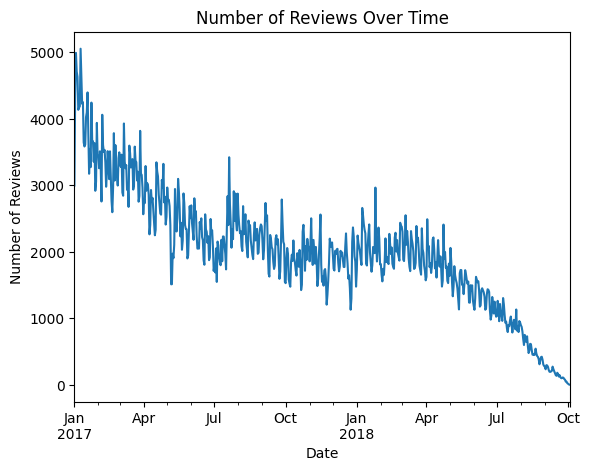

In [ ]:
import matplotlib.pyplot as plt

# Plot review count over time
df.set_index('datetime').resample('D')['reviewText'].count().plot()
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()


The histogram below shows the lengths of reviews up to a length of 1000. Showing all lengths was not useful, so the maximum length was set to 1000 characters.

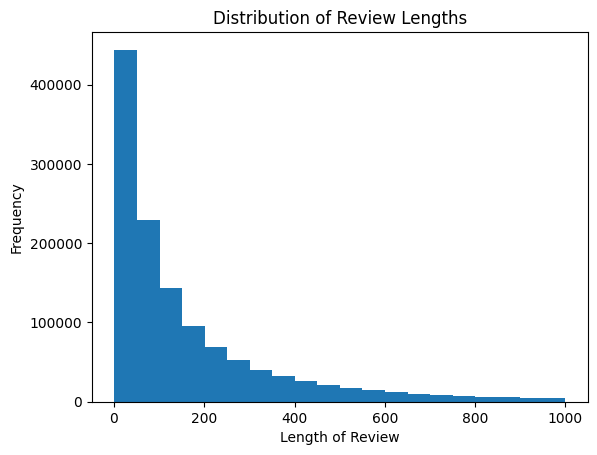

In [ ]:
# Plot histogram of review lengths
df['reviewText'] = df['reviewText'].astype(str)

df['review_length'] = df['reviewText'].apply(len)

filtered_df = df[(df['review_length'] >= 0) & (df['review_length'] <= 1000)]

filtered_df['review_length'].plot(kind='hist', bins=20)
plt.title('Distribution of Review Lengths')
plt.xlabel('Length of Review')
plt.ylabel('Frequency')
plt.show()


Reviews per user - top 25.

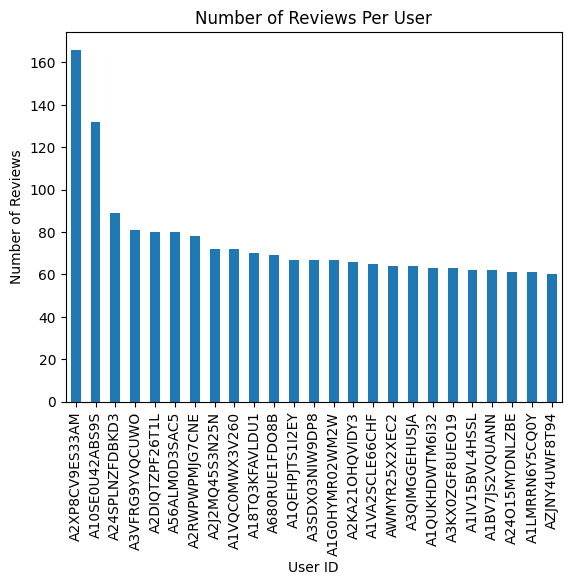

In [ ]:
# Plot number of reviews per user
#df['reviewerID'].value_counts().plot(kind='bar')

reviews_per_user.head(25).plot(kind="bar")
plt.title('Number of Reviews Per User')
plt.xlabel('User ID')
plt.ylabel('Number of Reviews')
plt.show()


Reviews per product - top 25

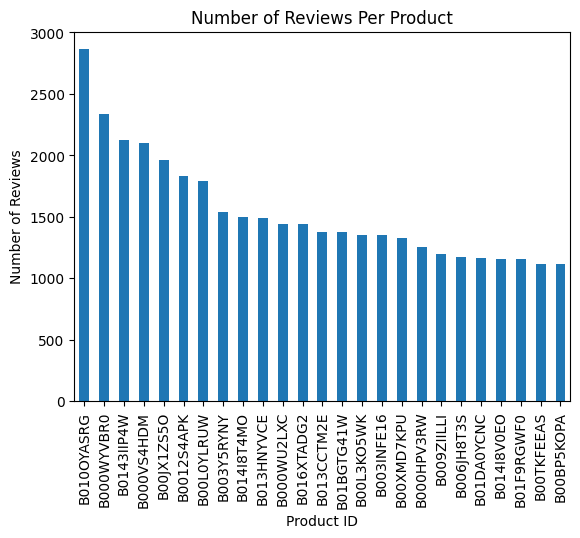

In [ ]:
reviews_per_product.head(25).plot(kind='bar')
plt.title('Number of Reviews Per Product')
plt.xlabel('Product ID')
plt.ylabel('Number of Reviews')
plt.show()


Distribution of top 5 summaries.

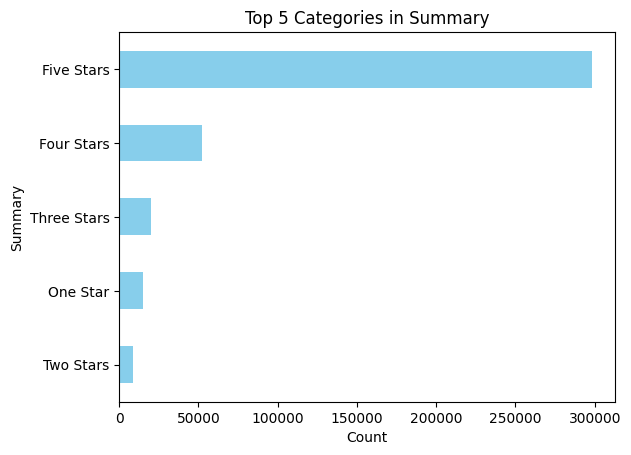

In [ ]:
top_categories = df['summary'].value_counts().head(5)
top_categories.plot(kind='barh', color='skyblue')

plt.title('Top 5 Categories in Summary')
plt.xlabel('Count')
plt.ylabel('Summary')
plt.gca().invert_yaxis()  # Invert y-axis to show highest count at the top
plt.show()


Word Cloud

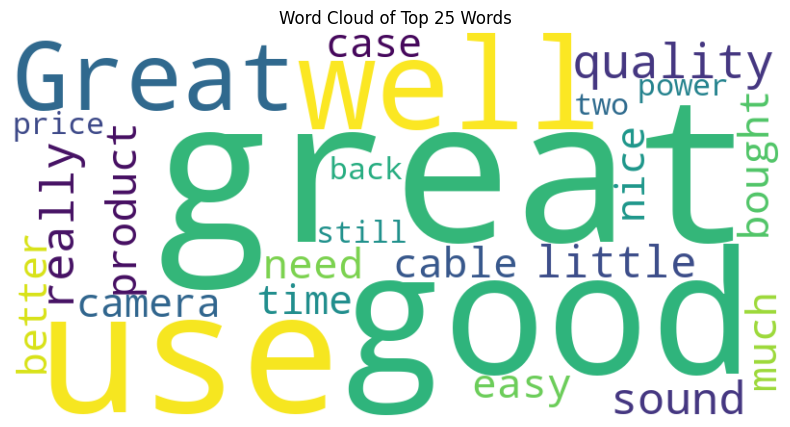

In [ ]:
from wordcloud import WordCloud, STOPWORDS

# Combine all text into one string
all_text = ' '.join(df['reviewText'])

stopwords = set(STOPWORDS)
stopwords.update(['will', 'one', 'work', 'it.', 'even', 'used', 'using', 'Great', 'works', '-'])

# Calculate word frequencies
word_counts = {}
for word in all_text.split():
    if word.lower() not in stopwords:
        word_counts[word] = word_counts.get(word, 0) + 1

# Select top 5 words based on frequency
top_words = sorted(word_counts, key=word_counts.get, reverse=True)[:25]

# Generate word cloud from top 5 words
wordcloud_data = {word: word_counts[word] for word in top_words}
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_data)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top 25 Words')
plt.show()


The visualizations below shows the distribution of ratings for 5 products with the most reviews.

5 is the most common rating for all the products, but the fifth most-rated product had the most varied responses.

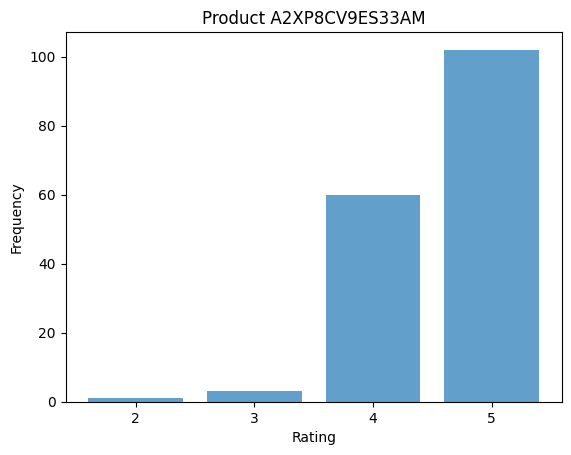

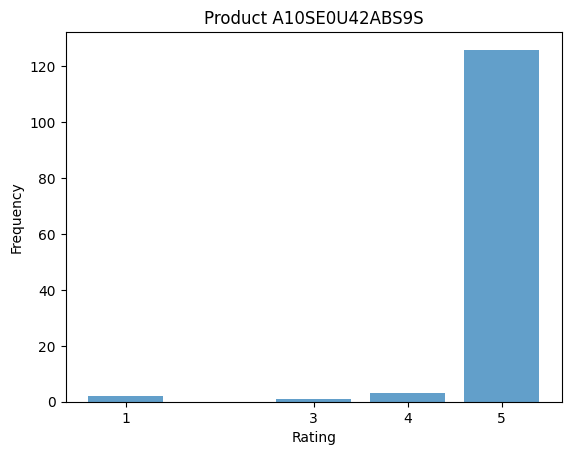

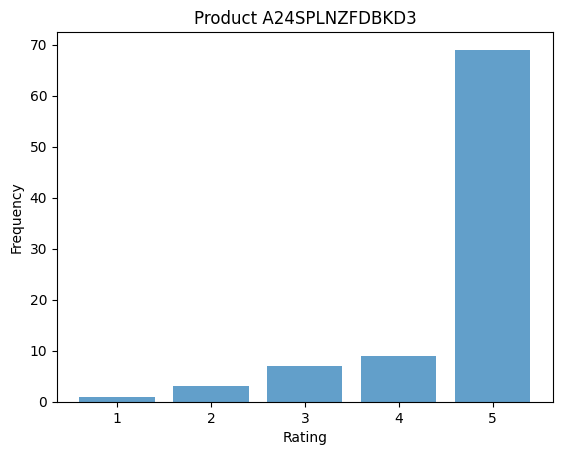

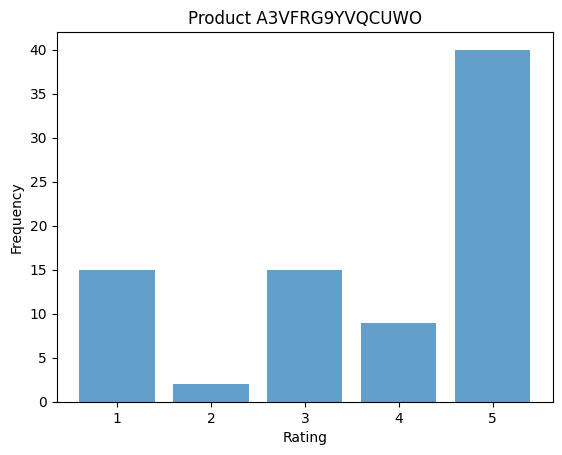

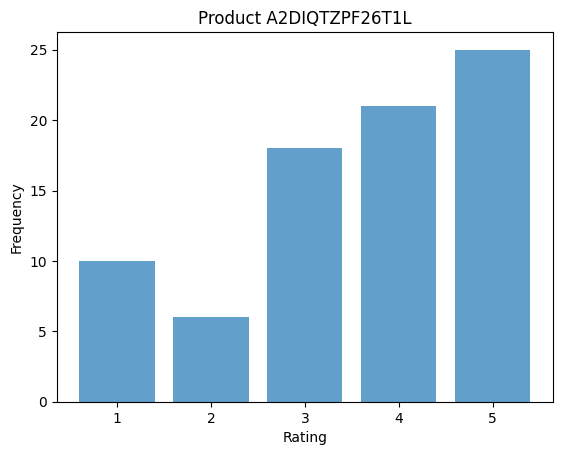

In [ ]:
product_reviews = df['reviewerID'].value_counts()

top_5_products = product_reviews.head(5).index

top_5_df = df[df['reviewerID'].isin(top_5_products)]


for i, product in enumerate(top_5_products, 1):
    product_data = df[df['reviewerID'] == product]['rating']
    rating_counts = product_data.value_counts().sort_index()
    plt.bar(rating_counts.index, rating_counts.values, alpha=0.7)
    plt.title(f'Product {product}')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.xticks(rating_counts.index)
    plt.show()



**3. Network Analysis**
- **Assigned to:** Selina
- **Responsibilities:**
  - Create and analyze the "also viewed" and "also bought" graphs to find popular product groups.
  - Use centrality measures to find important products in these networks.


**Objective:**
To create and analyze networks based on common reviewers, use centrality measures to find important products, and correlate these with review ratings to understand their impact on customer satisfaction.

**Create Product-Reviewer Network**

We will create a bipartite graph of products and reviewers. This step involves adding nodes for both products and reviewers and then creating edges based on review interactions. This helps us understand how products are related through common reviewers.

In [14]:
import networkx as nx

B = nx.Graph()

products = df['asin'].unique()
reviewers = df['reviewerID'].unique()

B.add_nodes_from(products, bipartite=0)
B.add_nodes_from(reviewers, bipartite=1)

for _, row in df.iterrows():
    B.add_edge(row['asin'], row['reviewerID'])

print(f"Number of nodes: {B.number_of_nodes()}")
print(f"Number of edges: {B.number_of_edges()}")
print(f"Nodes: {list(B.nodes)[:10]}")
print(f"Edges: {list(B.edges)[:10]}")

Number of nodes: 482409
Number of edges: 1273252
Nodes: ['0511189877', '0594459451', '0594450268', '073530498X', '0972683275', '106171327X', '140053271X', '1400699169', '1444700650', '1464120153']
Edges: [('0511189877', 'A7362LXMQEM6W'), ('0511189877', 'A2FRC7HJRIZ05T'), ('0594459451', 'A2Y8DXMYWXF7EA'), ('0594459451', 'A2HBCD46KD2RI3'), ('0594459451', 'A1JGR98FPPNTYA'), ('0594459451', 'A27WR1MUJH2RNP'), ('0594459451', 'AAVQY0EFE3XBL'), ('0594450268', 'AC6C9VNULPB3T'), ('0594450268', 'A35HG2C0YE2BZ5'), ('0594450268', 'A3472NC8JOKIW1')]


**Project Bipartite Network to Product Network**

Next, we will project the bipartite graph into a product network. This projection helps us understand how products are related through common reviewers.

In [15]:
product_nodes = set(products)

P = nx.bipartite.weighted_projected_graph(B, product_nodes)

print(f"Number of nodes: {P.number_of_nodes()}")
print(f"Number of edges: {P.number_of_edges()}")
print(f"Nodes: {list(P.nodes)[:10]}")
print(f"Edges: {list(P.edges(data=True))[:10]}")

Number of nodes: 97768
Number of edges: 3222929
Nodes: ['B014ECWAN4', 'B014X49MWU', 'B009KSNVHM', 'B00745JMOY', 'B013JFY8GE', 'B00RO4LGY4', 'B01CDN7TDM', 'B00HXT8CYM', 'B013D9BFTY', 'B01FZNMJNC']
Edges: [('B014ECWAN4', 'B014I8V0EO', {'weight': 1}), ('B014ECWAN4', 'B014I8T4MO', {'weight': 1}), ('B014ECWAN4', 'B007Z07LVY', {'weight': 1}), ('B014ECWAN4', 'B00KR0QHXW', {'weight': 1}), ('B014ECWAN4', 'B00FQML02E', {'weight': 1}), ('B014ECWAN4', 'B01B6SM2L4', {'weight': 1}), ('B014ECWAN4', 'B0058UUR6E', {'weight': 1}), ('B014ECWAN4', 'B005LDLP8W', {'weight': 1}), ('B014ECWAN4', 'B01CQBRXOQ', {'weight': 1}), ('B014ECWAN4', 'B00K85XURC', {'weight': 1})]


**Calculate Centrality Measures with Approximation and Sampling**

Given the large size of the data, we will use sampling and approximation algorithms to calculate centrality measures efficiently.

In [16]:
import random

# Sample 1000 nodes from the product network
sampled_nodes = random.sample(P.nodes(), 1000)
subgraph = P.subgraph(sampled_nodes)

degree_centrality_sub = nx.degree_centrality(subgraph)
betweenness_centrality_sub = nx.betweenness_centrality(subgraph, k=100, seed=42)
closeness_centrality_sub = nx.closeness_centrality(subgraph)

print(sorted(degree_centrality_sub.items(), key=lambda x: x[1], reverse=True)[:5])

<ipython-input-16-d7242e9d3a1e>:4: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  sampled_nodes = random.sample(P.nodes(), 1000)


[('B00XI87KV8', 0.026026026026026026), ('B00E8HGWIK', 0.01901901901901902), ('B00WIF2T7C', 0.018018018018018018), ('B00K4W62R4', 0.014014014014014014), ('B00NNDAFW4', 0.014014014014014014)]


The sampled centrality measures revealed the following top 5 products by degree centrality:

- Product B00XI87KV8: 0.026
- Product B00E8HGWIK: 0.019
- Product B00WIF2T7C: 0.018
- Product B00K4W62R4: 0.014
- Product B00NNDAFW4: 0.014

**Visualize the Network**

To make the network visualization more informative, we will color the nodes based on their average ratings. Products with higher ratings will be colored differently from those with lower ratings.

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(
<ipython-input-18-d5c4aa3a6119>:17: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis), label='Normalized Average Rating')


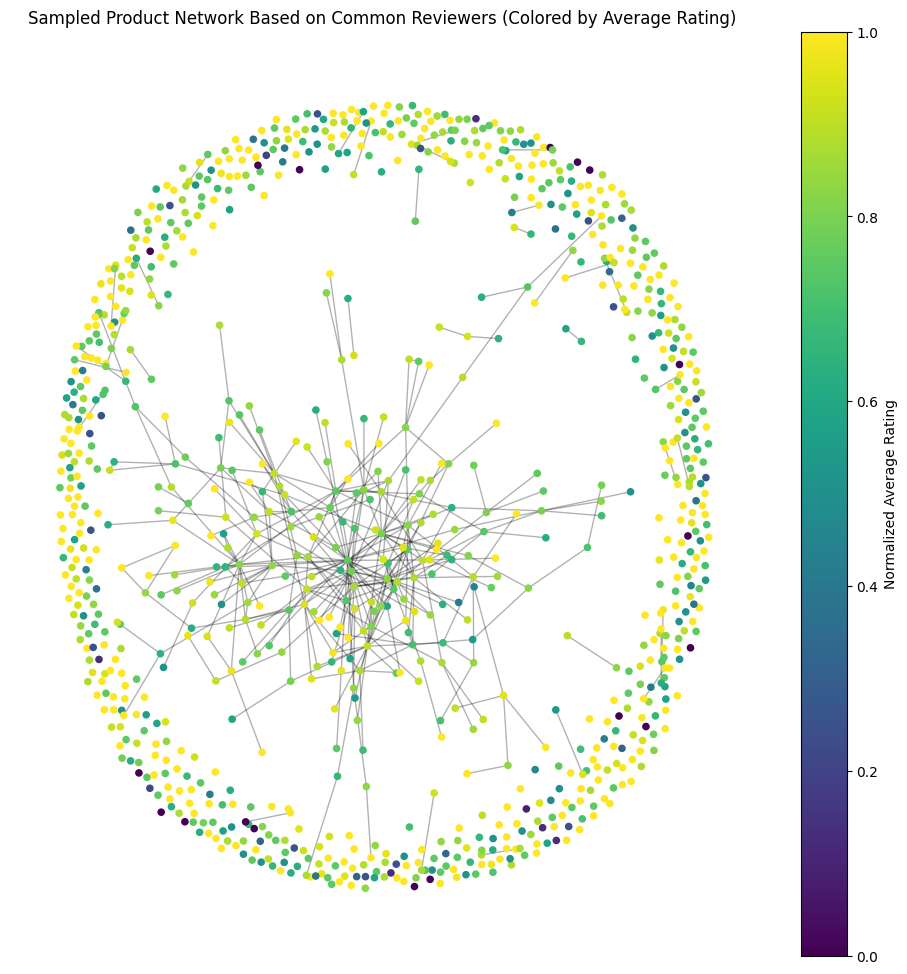

In [18]:
import matplotlib.pyplot as plt

# Calculate average ratings for each product
avg_ratings = df.groupby('asin')['rating'].mean()

# Normalize ratings for coloring
norm_ratings = (avg_ratings - avg_ratings.min()) / (avg_ratings.max() - avg_ratings.min())

# Assign colors based on normalized ratings
node_colors = [plt.cm.viridis(norm_ratings[node]) if node in norm_ratings else plt.cm.viridis(0.5) for node in subgraph.nodes()]

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(subgraph, k=0.15)
nx.draw_networkx_nodes(subgraph, pos, node_size=20, node_color=node_colors, cmap=plt.cm.viridis)
nx.draw_networkx_edges(subgraph, pos, alpha=0.3)
plt.title('Sampled Product Network Based on Common Reviewers (Colored by Average Rating)')
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis), label='Normalized Average Rating')
plt.axis('off')
plt.show()

### Interpretation of the Network Visualization

This network visualization shows a sample of products reviewed by common reviewers. The nodes represent individual products, and the edges represent connections between products that share common reviewers. The colors of the nodes indicate the average rating of each product, derived from the normalized average ratings.


1. **Node Colors:**
   - **Yellow nodes:** Products with high average ratings.
   - **Green nodes:** Products with moderate average ratings.
   - **Purple nodes:** Products with low average ratings.

2. **Network Structure:**
   - **Dense Center:** Products here are reviewed by many of the same reviewers, suggesting they are popular and frequently bought together.
   - **Sparse Edges:** Products here have fewer common reviewers, indicating they are less popular or more niche.

3. **Rating Distribution:**
   - High and low-rated products are spread throughout the network, not limited to any specific area.

4. **Clusters:**
   - Groups of closely connected products may indicate related items, such as those in the same category or frequently purchased together.

5. **Key Products:**
   - Central products with many connections are likely influential and can have a significant impact on customer satisfaction.

### Insights:

1. **Popularity and Satisfaction:** Central products with high ratings are important for customer satisfaction.
2. **Niche Products:** Less connected products highlight specific customer interests.
3. **Marketing and Recommendations:** Understanding these connections helps target marketing efforts and improve recommendations.
4. **Product Improvement:** Identifying central but poorly rated products can guide improvements.

This visualization helps us see which products are popular, how they are connected through common reviewers, and how their ratings compare.

**Analyze Top Products by Reviews**

To gain further insights, we will analyze the top products based on the number of reviews. This involves identifying the top 5 products and visualizing the distribution of their ratings.

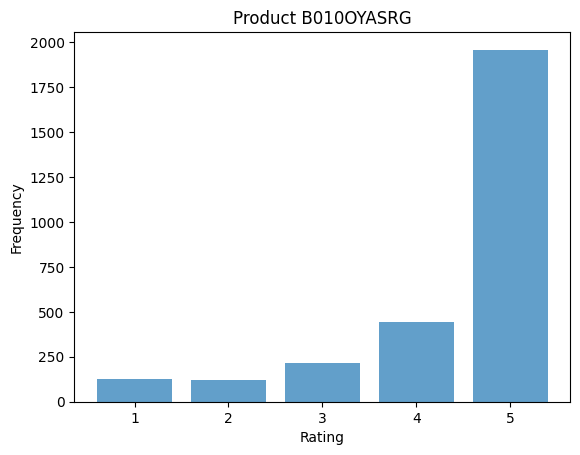

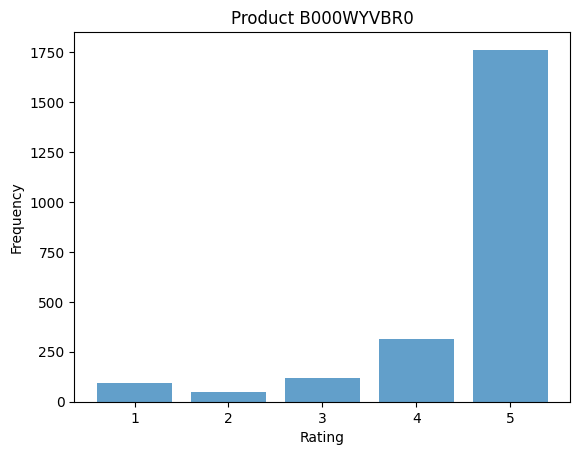

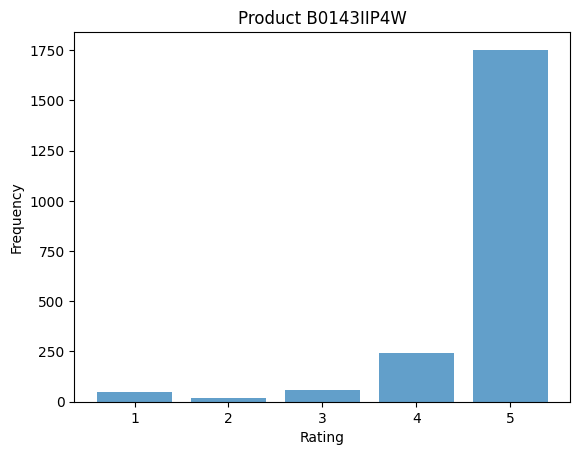

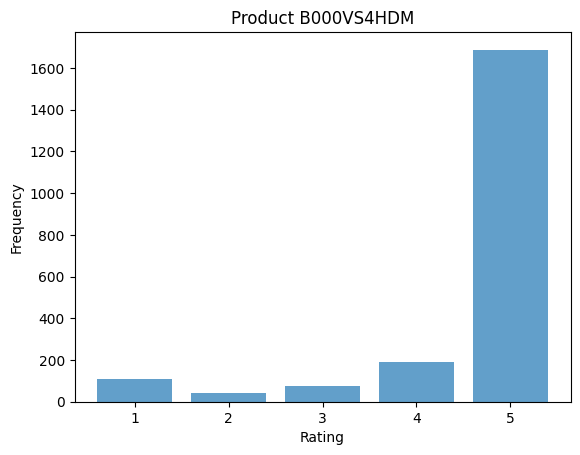

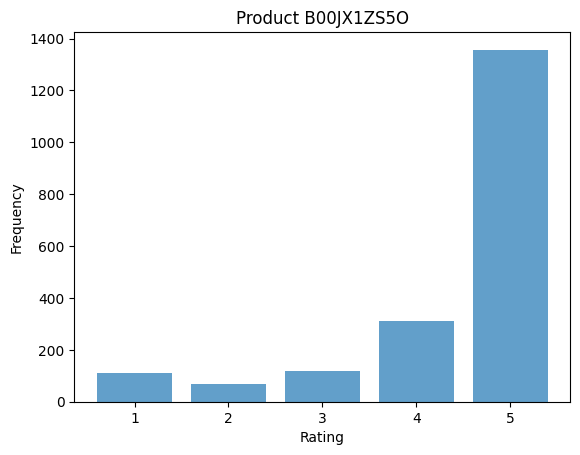

In [19]:
product_reviews = df['asin'].value_counts()
top_5_products = product_reviews.head(5).index

top_5_df = df[df['asin'].isin(top_5_products)]

for product in top_5_products:
    product_data = df[df['asin'] == product]['rating']
    rating_counts = product_data.value_counts().sort_index()
    plt.bar(rating_counts.index, rating_counts.values, alpha=0.7)
    plt.title(f'Product {product}')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.xticks(rating_counts.index)
    plt.show()

### Interpretation of the Rating Distribution Graphs

The graphs show the distribution of ratings for the top 5 products based on the number of reviews. Here’s a concise summary of the insights from these graphs:

1. **Overall Rating Trend:**
   - All five products have a significant number of 5-star ratings, indicating high customer satisfaction.

2. **Rating Distribution:**
   - The distribution of ratings across different products is similar, with a majority of reviews being 5 stars.
   - There are fewer 1, 2, and 3-star ratings compared to 4 and 5-star ratings.

### Key Insights:

- **High Customer Satisfaction:** The top products are generally well-received by customers, as evidenced by the high frequency of 5-star ratings.
- **Consistency Across Products:** The similar distribution patterns suggest that these popular products consistently meet or exceed customer expectations.



**Correlate Centrality Measures with Review Ratings**

Finally, we will correlate the centrality measures with average review ratings to see how the importance of products in the network relates to customer satisfaction.

                        degree_centrality  betweenness_centrality  \
degree_centrality                 1.00000                 0.83433   
betweenness_centrality            0.83433                 1.00000   
closeness_centrality              0.68577                 0.42196   
average_rating                    0.02991                 0.01147   

                        closeness_centrality  average_rating  
degree_centrality                   0.685770        0.029910  
betweenness_centrality              0.421960        0.011470  
closeness_centrality                1.000000        0.052006  
average_rating                      0.052006        1.000000  


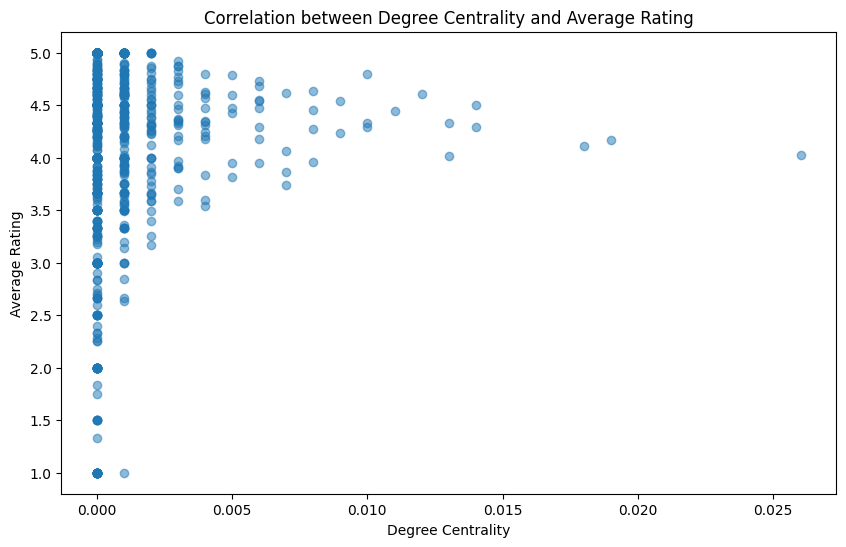

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

df_avg_rating = df.groupby('asin')['rating'].mean().reset_index()
df_avg_rating.columns = ['product_id', 'average_rating']

centrality_df = pd.DataFrame({
    'product_id': list(degree_centrality_sub.keys()),
    'degree_centrality': list(degree_centrality_sub.values()),
    'betweenness_centrality': list(betweenness_centrality_sub.values()),
    'closeness_centrality': list(closeness_centrality_sub.values())
})

centrality_df = centrality_df.merge(df_avg_rating, left_on='product_id', right_on='product_id')
centrality_df = centrality_df.dropna()

numeric_columns = ['degree_centrality', 'betweenness_centrality', 'closeness_centrality', 'average_rating']
correlation_matrix = centrality_df[numeric_columns].corr()
print(correlation_matrix)

plt.figure(figsize=(10, 6))
plt.scatter(centrality_df['degree_centrality'], centrality_df['average_rating'], alpha=0.5)
plt.xlabel('Degree Centrality')
plt.ylabel('Average Rating')
plt.title('Correlation between Degree Centrality and Average Rating')
plt.show()


### Interpretation of Results

- **Degree Centrality and Average Rating:** Very weak positive correlation (0.02991), indicating that having more connections does not significantly influence average ratings.
- **Betweenness Centrality and Average Rating:** Very weak positive correlation (0.01147), suggesting that products acting as bridges do not strongly impact average ratings.
- **Closeness Centrality and Average Rating:** Slightly stronger but still weak positive correlation (0.05201), meaning proximity to other products has a minimal effect on ratings.
- **Inter-Centrality Relationships:** Strong correlation between degree and betweenness centrality (0.83433) and moderate correlation between degree and closeness centrality (0.68577).

### Key Insights

- **Popularity and Satisfaction:** Central products with high ratings are important for customer satisfaction.
- **Niche Products:** Less connected products highlight specific customer interests.

### Conclusion

This analysis helps us see which products are popular, how they are connected through common reviewers, and how their ratings compare. The correlation analysis shows that centrality measures have a minimal impact on average ratings, suggesting other factors may play a more significant role in determining customer satisfaction.

**4. NLP and Text Mining**
- **Assigned to:** Matt
- **Responsibilities:**
  - Perform sentiment analysis on review texts to measure customer satisfaction.
  - Do topic modeling to find common themes in positive and negative reviews.


**5. Predictive Analysis**
- **Assigned to:** Julia and Haig
- **Responsibilities:**
  - Train machine learning models to predict review ratings based on review text and product features.
  - Evaluate model performance and improve it as needed.


References:

1. Justifying recommendations using distantly-labeled reviews and fine-grained aspects  
Jianmo Ni, Jiacheng Li, Julian McAuley  
Empirical Methods in Natural Language Processing (EMNLP), 2019
